<h1 style="font-family:verdana;"> <center> </center> </h1>
<h1 style="font-family:verdana;"> <center>Informed Searches</center> </h1>
<h1 style="font-family:verdana;"> <center>A* Search</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">Instructor:Ms. Zill-E-Huma</center></p>

***

# 👋Let's begin!
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    
</div>

# 🔬Overview
<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Informed search algorithms, also known as heuristic search algorithms, use problem- specific knowledgeto find solutions more efficiently than uninformed search algorithms. These algorithms make use of a heuristic function to estimate the cost of reaching the goal from a given state.</p>

# 🧮 Algorithm

<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:30px; font-family:verdana; line-height: 1.7em">

1. Initialize the open list with the initial state and its f-score to be the heuristic estimate from the initial state to the goal.
2. Initialize the closed list as empty.
3. While the open list is not empty:

>o Remove the state with the lowest f-score from the open list.

>o If the state is the goal state, return the path to the goal.

>o Otherwise, expand the state and add its neighbors to the open list with updated fscores.

>o Add the current state to the closed list. If the open list is empty and the goal state has not been found, return failure.

4. If the open set is empty and the goal has not been reached, return failure.</p>

#Problem Statement
Given an initial state of a 8-puzzle problem and final state to be reached-




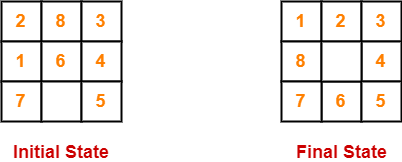


Find the most cost-effective path to reach the final state from initial state using A* Algorithm.

Consider g(n) = Depth of node
and h(n) = Number of misplaced tiles.



#Solution

In [1]:
import heapq as hp

def a_star_search(start, goal, heuristic):
    open_list = [(0 + heuristic(start, goal), 0, start, [])]  # non-visited list
    closed_list = set()  # visited list

    while open_list:
        _, cost_so_far, current_state, path = hp.heappop(open_list)

        # Check if the current state is the goal state then return the path.
        if current_state == goal:
            return path + [current_state]

        # Add the current state to the visited list
        closed_list.add(tuple(map(tuple, current_state)))

        # Explore the neighbors of the current state
        for move, neighbor in next_possible_states(current_state):
            new_cost = cost_so_far + 1  # each move has a cost of 1
            f_score = new_cost + heuristic(neighbor, goal)    #sum of new_cost and the heuristic value of the neighbor.

            if tuple(map(tuple, neighbor)) not in closed_list:    #Check if the neighbor is not visited then
                hp.heappush(open_list, (f_score, new_cost, neighbor, path + [(current_state, move)]))  #add the values into the open_list

    return "No solution found"

#Counts the number of misplaced tiles in the current state compared to the goal state, ignoring the empty tile (0).
def heuristic(curr_state, goal):
    count = 0
    for i in range(len(curr_state)):
        for j in range(len(curr_state[i])):
            if curr_state[i][j] != goal[i][j] and curr_state[i][j] != 0:  # Ignore empty tile in heuristic
                count += 1
    return count

#Generate all possible states by moving the empty tile (0).
def next_possible_states(curr_state):
    next_states = []
    i, j = None, None
    for x in range(3):
        for y in range(3):
            if curr_state[x][y] == 0:  #find the position of the empty tile
                i, j = x, y
                break
        if i is not None and j is not None:
            break

    # Moving Up
    if i > 0:
        curr_state[i][j], curr_state[i-1][j] = curr_state[i-1][j], curr_state[i][j]
        next_states.append(('Up', [row[:] for row in curr_state]))
        curr_state[i][j], curr_state[i-1][j] = curr_state[i-1][j], curr_state[i][j]
    # Moving Down
    if i < 2:
        curr_state[i][j], curr_state[i+1][j] = curr_state[i+1][j], curr_state[i][j]
        next_states.append(('Down', [row[:] for row in curr_state]))
        curr_state[i][j], curr_state[i+1][j] = curr_state[i+1][j], curr_state[i][j]
    # Moving Left
    if j > 0:
        curr_state[i][j], curr_state[i][j-1] = curr_state[i][j-1], curr_state[i][j]
        next_states.append(('Left', [row[:] for row in curr_state]))
        curr_state[i][j], curr_state[i][j-1] = curr_state[i][j-1], curr_state[i][j]
    # Moving Right
    if j < 2:
        curr_state[i][j], curr_state[i][j+1] = curr_state[i][j+1], curr_state[i][j]
        next_states.append(('Right', [row[:] for row in curr_state]))
        curr_state[i][j], curr_state[i][j+1] = curr_state[i][j+1], curr_state[i][j]

    return next_states

# Initial and goal states from the provided image
initial = [
    [2, 8, 3],
    [1, 6, 4],
    [7, 0, 5]
]

goal = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

result = a_star_search(initial, goal, heuristic)
if result != "No solution found":
    path = result
    print(f"Solved! Path to goal:")
    for step in path:
        for row in step:
            print(row)
        print()
else:
    print(result)


Solved! Path to goal:
[[2, 8, 3], [1, 6, 4], [7, 0, 5]]
Up

[[2, 8, 3], [1, 0, 4], [7, 6, 5]]
Up

[[2, 0, 3], [1, 8, 4], [7, 6, 5]]
Left

[[0, 2, 3], [1, 8, 4], [7, 6, 5]]
Down

[[1, 2, 3], [0, 8, 4], [7, 6, 5]]
Right

[1, 2, 3]
[8, 0, 4]
[7, 6, 5]



***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Hope you liked today's class!
        </p>
    </div>

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s'
     height=120px width=160px /></center>